##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE214295**

file previously downloaded:
GSE214295_RAW.tar

unzipped using 
``` bash
tar -xvf GSE214295_RAW.tar
```

This gives the following files:                         
* GSM6603324_Primary001_barcodes.tsv.gz
* GSM6603324_Primary001_genes.tsv.gz
* GSM6603324_Primary001_matrix.mtx.gz
* GSM6603325_Primary002_barcodes.tsv.gz
* GSM6603325_Primary002_genes.tsv.gz
* GSM6603325_Primary002_matrix.mtx.gz
* GSM6603326_Primary003_barcodes.tsv.gz
* GSM6603326_Primary003_genes.tsv.gz
* GSM6603326_Primary003_matrix.mtx.gz
* GSM6603327_PDO001_barcodes.tsv.gz
* GSM6603327_PDO001_genes.tsv.gz
* GSM6603327_PDO001_matrix.mtx.gz
* GSM6603328_PDO002_barcodes.tsv.gz
* GSM6603328_PDO002_genes.tsv.gz
* GSM6603328_PDO002_matrix.mtx.gz
* GSM6603329_PDO003_barcodes.tsv.gz
* GSM6603329_PDO003_genes.tsv.gz
* GSM6603329_PDO003_matrix.mtx.gz

Files organised in to correct folders and file names, only analysing tumour (PDO samples are organoids, not analysing these)

## here onwards not edited

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE139324')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE139324"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [5]:
#load all datasets
HNSCC_1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_1")
HNSCC_2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_2")
HNSCC_3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_3")
HNSCC_4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_4")
HNSCC_5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_5")
HNSCC_6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_6")
HNSCC_7.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_7")
HNSCC_8.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_8")
HNSCC_9.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_9")
HNSCC_10.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_10")
HNSCC_11.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_11")
HNSCC_12.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_12")
HNSCC_13.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_13")
HNSCC_14.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_14")
HNSCC_15.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_15")
HNSCC_16.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_16")
HNSCC_17.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_17")
HNSCC_18.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_18")
HNSCC_19.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_19")
HNSCC_20.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_20")
HNSCC_21.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_21")
HNSCC_22.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_22")
HNSCC_23.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_23")
HNSCC_24.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_24")
HNSCC_25.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_25")
HNSCC_26.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HNSCC_26")
HD_1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HD_1")
HD_2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HD_2")
HD_3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HD_3")
HD_4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HD_4")
HD_5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE139324/HD_5")

In [6]:
#Add dataset info to colnames
colnames(HNSCC_1.data) <- paste0("GSE139324_HNSCC_1_", colnames(HNSCC_1.data))
colnames(HNSCC_2.data) <- paste0("GSE139324_HNSCC_2_", colnames(HNSCC_2.data))
colnames(HNSCC_3.data) <- paste0("GSE139324_HNSCC_3_", colnames(HNSCC_3.data))
colnames(HNSCC_4.data) <- paste0("GSE139324_HNSCC_4_", colnames(HNSCC_4.data))
colnames(HNSCC_5.data) <- paste0("GSE139324_HNSCC_5_", colnames(HNSCC_5.data))
colnames(HNSCC_6.data) <- paste0("GSE139324_HNSCC_6_", colnames(HNSCC_6.data))
colnames(HNSCC_7.data) <- paste0("GSE139324_HNSCC_7_", colnames(HNSCC_7.data))
colnames(HNSCC_8.data) <- paste0("GSE139324_HNSCC_8_", colnames(HNSCC_8.data))
colnames(HNSCC_9.data) <- paste0("GSE139324_HNSCC_9_", colnames(HNSCC_9.data))
colnames(HNSCC_10.data) <- paste0("GSE139324_HNSCC_10_", colnames(HNSCC_10.data))
colnames(HNSCC_11.data) <- paste0("GSE139324_HNSCC_11_", colnames(HNSCC_11.data))
colnames(HNSCC_12.data) <- paste0("GSE139324_HNSCC_12_", colnames(HNSCC_12.data))
colnames(HNSCC_13.data) <- paste0("GSE139324_HNSCC_13_", colnames(HNSCC_13.data))
colnames(HNSCC_14.data) <- paste0("GSE139324_HNSCC_14_", colnames(HNSCC_14.data))
colnames(HNSCC_15.data) <- paste0("GSE139324_HNSCC_15_", colnames(HNSCC_15.data))
colnames(HNSCC_16.data) <- paste0("GSE139324_HNSCC_16_", colnames(HNSCC_16.data))
colnames(HNSCC_17.data) <- paste0("GSE139324_HNSCC_17_", colnames(HNSCC_17.data))
colnames(HNSCC_18.data) <- paste0("GSE139324_HNSCC_18_", colnames(HNSCC_18.data))
colnames(HNSCC_19.data) <- paste0("GSE139324_HNSCC_19_", colnames(HNSCC_19.data))
colnames(HNSCC_20.data) <- paste0("GSE139324_HNSCC_20_", colnames(HNSCC_20.data))
colnames(HNSCC_21.data) <- paste0("GSE139324_HNSCC_21_", colnames(HNSCC_21.data))
colnames(HNSCC_22.data) <- paste0("GSE139324_HNSCC_22_", colnames(HNSCC_22.data))
colnames(HNSCC_23.data) <- paste0("GSE139324_HNSCC_23_", colnames(HNSCC_23.data))
colnames(HNSCC_24.data) <- paste0("GSE139324_HNSCC_24_", colnames(HNSCC_24.data))
colnames(HNSCC_25.data) <- paste0("GSE139324_HNSCC_25_", colnames(HNSCC_25.data))
colnames(HNSCC_26.data) <- paste0("GSE139324_HNSCC_26_", colnames(HNSCC_26.data))
colnames(HD_1.data) <- paste0("GSE139324_HD_1_", colnames(HD_1.data))
colnames(HD_2.data) <- paste0("GSE139324_HD_2_", colnames(HD_2.data))
colnames(HD_3.data) <- paste0("GSE139324_HD_3_", colnames(HD_3.data))
colnames(HD_4.data) <- paste0("GSE139324_HD_4_", colnames(HD_4.data))
colnames(HD_5.data) <- paste0("GSE139324_HD_5_", colnames(HD_5.data))


In [8]:
head(colnames(HNSCC_1.data))
head(colnames(HNSCC_17.data))
head(colnames(HD_3.data))

[1] "GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1"
[2] "GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1"
[3] "GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1"
[4] "GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1"
[5] "GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1"
[6] "GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1"

[1] "GSE139324_HNSCC_17_AAACCTGAGCGTAGTG-1"
[2] "GSE139324_HNSCC_17_AAACCTGAGGTCATCT-1"
[3] "GSE139324_HNSCC_17_AAACCTGAGTGCGATG-1"
[4] "GSE139324_HNSCC_17_AAACCTGCAGCCTTGG-1"
[5] "GSE139324_HNSCC_17_AAACCTGGTTAAAGAC-1"
[6] "GSE139324_HNSCC_17_AAACCTGGTTACGACT-1"

[1] "GSE139324_HD_3_AAACCTGAGCTAAGAT-1" "GSE139324_HD_3_AAACCTGGTAGCGTAG-1"
[3] "GSE139324_HD_3_AAACCTGTCCTCGCAT-1" "GSE139324_HD_3_AAACGGGAGGAGCGAG-1"
[5] "GSE139324_HD_3_AAACGGGCATATACCG-1" "GSE139324_HD_3_AAACGGGGTCGAGTTT-1"

In [9]:
#create seperate seurat object for each sample
HNSCC_1 <- CreateSeuratObject(counts = HNSCC_1.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_1@meta.data$sample_type <- "tumour"
HNSCC_1@meta.data$cancer_type <- "HNSCC"
HNSCC_1@meta.data$patient_id <- "HNSCC_1"
HNSCC_1@meta.data$sample_id <- "GSE139324_HNSCC_1"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [10]:
#create seperate seurat object for each sample
HNSCC_2 <- CreateSeuratObject(counts = HNSCC_2.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_2@meta.data$sample_type <- "tumour"
HNSCC_2@meta.data$cancer_type <- "HNSCC"
HNSCC_2@meta.data$patient_id <- "HNSCC_2"
HNSCC_2@meta.data$sample_id <- "GSE139324_HNSCC_2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [11]:
#create seperate seurat object for each sample
HNSCC_3 <- CreateSeuratObject(counts = HNSCC_3.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_3@meta.data$sample_type <- "tumour"
HNSCC_3@meta.data$cancer_type <- "HNSCC"
HNSCC_3@meta.data$patient_id <- "HNSCC_3"
HNSCC_3@meta.data$sample_id <- "GSE139324_HNSCC_3"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [12]:
#create seperate seurat object for each sample
HNSCC_4 <- CreateSeuratObject(counts = HNSCC_4.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_4@meta.data$sample_type <- "tumour"
HNSCC_4@meta.data$cancer_type <- "HNSCC"
HNSCC_4@meta.data$patient_id <- "HNSCC_4"
HNSCC_4@meta.data$sample_id <- "GSE139324_HNSCC_4"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [13]:
#create seperate seurat object for each sample
HNSCC_5 <- CreateSeuratObject(counts = HNSCC_5.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_5@meta.data$sample_type <- "tumour"
HNSCC_5@meta.data$cancer_type <- "HNSCC"
HNSCC_5@meta.data$patient_id <- "HNSCC_5"
HNSCC_5@meta.data$sample_id <- "GSE139324_HNSCC_5"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [14]:
#create seperate seurat object for each sample
HNSCC_6 <- CreateSeuratObject(counts = HNSCC_6.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_6@meta.data$sample_type <- "tumour"
HNSCC_6@meta.data$cancer_type <- "HNSCC"
HNSCC_6@meta.data$patient_id <- "HNSCC_6"
HNSCC_6@meta.data$sample_id <- "GSE139324_HNSCC_6"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [15]:
#create seperate seurat object for each sample
HNSCC_7 <- CreateSeuratObject(counts = HNSCC_7.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_7@meta.data$sample_type <- "tumour"
HNSCC_7@meta.data$cancer_type <- "HNSCC"
HNSCC_7@meta.data$patient_id <- "HNSCC_7"
HNSCC_7@meta.data$sample_id <- "GSE139324_HNSCC_7"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
#create seperate seurat object for each sample
HNSCC_8 <- CreateSeuratObject(counts = HNSCC_8.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_8@meta.data$sample_type <- "tumour"
HNSCC_8@meta.data$cancer_type <- "HNSCC"
HNSCC_8@meta.data$patient_id <- "HNSCC_8"
HNSCC_8@meta.data$sample_id <- "GSE139324_HNSCC_8"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
#create seperate seurat object for each sample
HNSCC_9 <- CreateSeuratObject(counts = HNSCC_9.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_9@meta.data$sample_type <- "tumour"
HNSCC_9@meta.data$cancer_type <- "HNSCC"
HNSCC_9@meta.data$patient_id <- "HNSCC_9"
HNSCC_9@meta.data$sample_id <- "GSE139324_HNSCC_9"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
#create seperate seurat object for each sample
HNSCC_10 <- CreateSeuratObject(counts = HNSCC_10.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_10@meta.data$sample_type <- "tumour"
HNSCC_10@meta.data$cancer_type <- "HNSCC"
HNSCC_10@meta.data$patient_id <- "HNSCC_10"
HNSCC_10@meta.data$sample_id <- "GSE139324_HNSCC_10"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [19]:
#create seperate seurat object for each sample
HNSCC_11 <- CreateSeuratObject(counts = HNSCC_11.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_11@meta.data$sample_type <- "tumour"
HNSCC_11@meta.data$cancer_type <- "HNSCC"
HNSCC_11@meta.data$patient_id <- "HNSCC_11"
HNSCC_11@meta.data$sample_id <- "GSE139324_HNSCC_11"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [20]:
#create seperate seurat object for each sample
HNSCC_12 <- CreateSeuratObject(counts = HNSCC_12.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_12@meta.data$sample_type <- "tumour"
HNSCC_12@meta.data$cancer_type <- "HNSCC"
HNSCC_12@meta.data$patient_id <- "HNSCC_12"
HNSCC_12@meta.data$sample_id <- "GSE139324_HNSCC_12"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [21]:
#create seperate seurat object for each sample
HNSCC_13 <- CreateSeuratObject(counts = HNSCC_13.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_13@meta.data$sample_type <- "tumour"
HNSCC_13@meta.data$cancer_type <- "HNSCC"
HNSCC_13@meta.data$patient_id <- "HNSCC_13"
HNSCC_13@meta.data$sample_id <- "GSE139324_HNSCC_13"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [22]:
#create seperate seurat object for each sample
HNSCC_14 <- CreateSeuratObject(counts = HNSCC_14.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_14@meta.data$sample_type <- "tumour"
HNSCC_14@meta.data$cancer_type <- "HNSCC"
HNSCC_14@meta.data$patient_id <- "HNSCC_14"
HNSCC_14@meta.data$sample_id <- "GSE139324_HNSCC_14"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [23]:
#create seperate seurat object for each sample
HNSCC_15 <- CreateSeuratObject(counts = HNSCC_15.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_15@meta.data$sample_type <- "tumour"
HNSCC_15@meta.data$cancer_type <- "HNSCC"
HNSCC_15@meta.data$patient_id <- "HNSCC_15"
HNSCC_15@meta.data$sample_id <- "GSE139324_HNSCC_15"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [24]:
#create seperate seurat object for each sample
HNSCC_16 <- CreateSeuratObject(counts = HNSCC_16.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_16@meta.data$sample_type <- "tumour"
HNSCC_16@meta.data$cancer_type <- "HNSCC"
HNSCC_16@meta.data$patient_id <- "HNSCC_16"
HNSCC_16@meta.data$sample_id <- "GSE139324_HNSCC_16"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [25]:
#create seperate seurat object for each sample
HNSCC_17 <- CreateSeuratObject(counts = HNSCC_17.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_17@meta.data$sample_type <- "tumour"
HNSCC_17@meta.data$cancer_type <- "HNSCC"
HNSCC_17@meta.data$patient_id <- "HNSCC_17"
HNSCC_17@meta.data$sample_id <- "GSE139324_HNSCC_17"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [26]:
#create seperate seurat object for each sample
HNSCC_18 <- CreateSeuratObject(counts = HNSCC_18.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_18@meta.data$sample_type <- "tumour"
HNSCC_18@meta.data$cancer_type <- "HNSCC"
HNSCC_18@meta.data$patient_id <- "HNSCC_18"
HNSCC_18@meta.data$sample_id <- "GSE139324_HNSCC_18"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [27]:
#create seperate seurat object for each sample
HNSCC_19 <- CreateSeuratObject(counts = HNSCC_19.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_19@meta.data$sample_type <- "tumour"
HNSCC_19@meta.data$cancer_type <- "HNSCC"
HNSCC_19@meta.data$patient_id <- "HNSCC_19"
HNSCC_19@meta.data$sample_id <- "GSE139324_HNSCC_19"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [28]:
#create seperate seurat object for each sample
HNSCC_20 <- CreateSeuratObject(counts = HNSCC_20.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_20@meta.data$sample_type <- "tumour"
HNSCC_20@meta.data$cancer_type <- "HNSCC"
HNSCC_20@meta.data$patient_id <- "HNSCC_20"
HNSCC_20@meta.data$sample_id <- "GSE139324_HNSCC_20"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [29]:
#create seperate seurat object for each sample
HNSCC_21 <- CreateSeuratObject(counts = HNSCC_21.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_21@meta.data$sample_type <- "tumour"
HNSCC_21@meta.data$cancer_type <- "HNSCC"
HNSCC_21@meta.data$patient_id <- "HNSCC_21"
HNSCC_21@meta.data$sample_id <- "GSE139324_HNSCC_21"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [30]:
#create seperate seurat object for each sample
HNSCC_22 <- CreateSeuratObject(counts = HNSCC_22.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_22@meta.data$sample_type <- "tumour"
HNSCC_22@meta.data$cancer_type <- "HNSCC"
HNSCC_22@meta.data$patient_id <- "HNSCC_22"
HNSCC_22@meta.data$sample_id <- "GSE139324_HNSCC_22"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [31]:
#create seperate seurat object for each sample
HNSCC_23 <- CreateSeuratObject(counts = HNSCC_23.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_23@meta.data$sample_type <- "tumour"
HNSCC_23@meta.data$cancer_type <- "HNSCC"
HNSCC_23@meta.data$patient_id <- "HNSCC_23"
HNSCC_23@meta.data$sample_id <- "GSE139324_HNSCC_23"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [32]:
#create seperate seurat object for each sample
HNSCC_24 <- CreateSeuratObject(counts = HNSCC_24.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_24@meta.data$sample_type <- "tumour"
HNSCC_24@meta.data$cancer_type <- "HNSCC"
HNSCC_24@meta.data$patient_id <- "HNSCC_24"
HNSCC_24@meta.data$sample_id <- "GSE139324_HNSCC_24"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [33]:
#create seperate seurat object for each sample
HNSCC_25 <- CreateSeuratObject(counts = HNSCC_25.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_25@meta.data$sample_type <- "tumour"
HNSCC_25@meta.data$cancer_type <- "HNSCC"
HNSCC_25@meta.data$patient_id <- "HNSCC_25"
HNSCC_25@meta.data$sample_id <- "GSE139324_HNSCC_25"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [34]:
#create seperate seurat object for each sample
HNSCC_26 <- CreateSeuratObject(counts = HNSCC_26.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HNSCC_26@meta.data$sample_type <- "tumour"
HNSCC_26@meta.data$cancer_type <- "HNSCC"
HNSCC_26@meta.data$patient_id <- "HNSCC_26"
HNSCC_26@meta.data$sample_id <- "GSE139324_HNSCC_26"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [35]:
#create seperate seurat object for each sample
HD_1 <- CreateSeuratObject(counts = HD_1.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HD_1@meta.data$sample_type <- "healthy_tonsil"
HD_1@meta.data$cancer_type <- "Healthy"
HD_1@meta.data$patient_id <- "HD_1"
HD_1@meta.data$sample_id <- "GSE139324_HD_1"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [36]:
#create seperate seurat object for each sample
HD_2 <- CreateSeuratObject(counts = HD_2.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HD_2@meta.data$sample_type <- "healthy_tonsil"
HD_2@meta.data$cancer_type <- "Healthy"
HD_2@meta.data$patient_id <- "HD_2"
HD_2@meta.data$sample_id <- "GSE139324_HD_2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [37]:
#create seperate seurat object for each sample
HD_3 <- CreateSeuratObject(counts = HD_3.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HD_3@meta.data$sample_type <- "healthy_tonsil"
HD_3@meta.data$cancer_type <- "Healthy"
HD_3@meta.data$patient_id <- "HD_3"
HD_3@meta.data$sample_id <- "GSE139324_HD_3"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [38]:
#create seperate seurat object for each sample
HD_4 <- CreateSeuratObject(counts = HD_4.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HD_4@meta.data$sample_type <- "healthy_tonsil"
HD_4@meta.data$cancer_type <- "Healthy"
HD_4@meta.data$patient_id <- "HD_4"
HD_4@meta.data$sample_id <- "GSE139324_HD_4"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [39]:
#create seperate seurat object for each sample
HD_5 <- CreateSeuratObject(counts = HD_5.data, project = "GSE139324", min.features = 200)
#add metadata to sample
HD_5@meta.data$sample_type <- "healthy_tonsil"
HD_5@meta.data$cancer_type <- "Healthy"
HD_5@meta.data$patient_id <- "HD_5"
HD_5@meta.data$sample_id <- "GSE139324_HD_5"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [41]:
head(HNSCC_17@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE139324_HNSCC_17_AAACCTGAGCGTAGTG-1 GSE139324  2418        966        
GSE139324_HNSCC_17_AAACCTGAGGTCATCT-1 GSE139324  7270       2079        
GSE139324_HNSCC_17_AAACCTGAGTGCGATG-1 GSE139324  3252       1163        
GSE139324_HNSCC_17_AAACCTGCAGCCTTGG-1 GSE139324  6602       1787        
GSE139324_HNSCC_17_AAACCTGGTTAAAGAC-1 GSE139324  4841       1827        
GSE139324_HNSCC_17_AAACCTGGTTACGACT-1 GSE139324  5287       1817        
                                      sample_type cancer_type patient_id
GSE139324_HNSCC_17_AAACCTGAGCGTAGTG-1 tumour      HNSCC       HNSCC_17  
GSE139324_HNSCC_17_AAACCTGAGGTCATCT-1 tumour      HNSCC       HNSCC_17  
GSE139324_HNSCC_17_AAACCTGAGTGCGATG-1 tumour      HNSCC       HNSCC_17  
GSE139324_HNSCC_17_AAACCTGCAGCCTTGG-1 tumour      HNSCC       HNSCC_17  
GSE139324_HNSCC_17_AAACCTGGTTAAAGAC-1 tumour      HNSCC       HNSCC_17  
GSE139324_HNSCC_17_AAACCTGGTTACGACT-1 tumour      HNSCC       HNSCC_17  
                                      sample_id         
GSE139324_HNSCC_17_AAACCTGAGCGTAGTG-1 GSE139324_HNSCC_17
GSE139324_HNSCC_17_AAACCTGAGGTCATCT-1 GSE139324_HNSCC_17
GSE139324_HNSCC_17_AAACCTGAGTGCGATG-1 GSE139324_HNSCC_17
GSE139324_HNSCC_17_AAACCTGCAGCCTTGG-1 GSE139324_HNSCC_17
GSE139324_HNSCC_17_AAACCTGGTTAAAGAC-1 GSE139324_HNSCC_17
GSE139324_HNSCC_17_AAACCTGGTTACGACT-1 GSE139324_HNSCC_17

In [42]:
#Merge seurat objects
HNSCC <- merge(HNSCC_1, y = c(HNSCC_2, HNSCC_3, HNSCC_4, HNSCC_5, HNSCC_6, HNSCC_7, HNSCC_8, HNSCC_9, HNSCC_10, HNSCC_11, HNSCC_12, HNSCC_13, HNSCC_14, HNSCC_15, HNSCC_16, HNSCC_17, HNSCC_18, HNSCC_19, HNSCC_20, HNSCC_21, HNSCC_22, HNSCC_23, HNSCC_24, HNSCC_25, HNSCC_26, HD_1, HD_2, HD_3, HD_4, HD_5), project = "GSE139324")

In [43]:
HNSCC
head(HNSCC@meta.data)
tail(HNSCC@meta.data)

An object of class Seurat 
33694 features across 73819 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 31 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31

orig.ident nCount_RNA nFeature_RNA
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 GSE139324   9917      2061        
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 GSE139324   4697      1261        
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 GSE139324   5976      1717        
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 GSE139324   4109       981        
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 GSE139324  22704      4222        
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 GSE139324   7038      1751        
                                     sample_type cancer_type patient_id
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 tumour      HNSCC       HNSCC_1   
                                     sample_id        
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 GSE139324_HNSCC_1
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 GSE139324_HNSCC_1
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 GSE139324_HNSCC_1
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 GSE139324_HNSCC_1
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 GSE139324_HNSCC_1
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 GSE139324_HNSCC_1

orig.ident nCount_RNA nFeature_RNA
GSE139324_HD_5_TTTGGTTGTCATGCCG-1 GSE139324  3530        984        
GSE139324_HD_5_TTTGTCAAGCTGCCCA-1 GSE139324  1931        636        
GSE139324_HD_5_TTTGTCAAGGGAACGG-1 GSE139324  2682       1061        
GSE139324_HD_5_TTTGTCACATGGGACA-1 GSE139324  2235        707        
GSE139324_HD_5_TTTGTCATCACCCTCA-1 GSE139324  5262       1715        
GSE139324_HD_5_TTTGTCATCATGTAGC-1 GSE139324  2940        929        
                                  sample_type    cancer_type patient_id
GSE139324_HD_5_TTTGGTTGTCATGCCG-1 healthy_tonsil Healthy     HD_5      
GSE139324_HD_5_TTTGTCAAGCTGCCCA-1 healthy_tonsil Healthy     HD_5      
GSE139324_HD_5_TTTGTCAAGGGAACGG-1 healthy_tonsil Healthy     HD_5      
GSE139324_HD_5_TTTGTCACATGGGACA-1 healthy_tonsil Healthy     HD_5      
GSE139324_HD_5_TTTGTCATCACCCTCA-1 healthy_tonsil Healthy     HD_5      
GSE139324_HD_5_TTTGTCATCATGTAGC-1 healthy_tonsil Healthy     HD_5      
                                  sample_id     
GSE139324_HD_5_TTTGGTTGTCATGCCG-1 GSE139324_HD_5
GSE139324_HD_5_TTTGTCAAGCTGCCCA-1 GSE139324_HD_5
GSE139324_HD_5_TTTGTCAAGGGAACGG-1 GSE139324_HD_5
GSE139324_HD_5_TTTGTCACATGGGACA-1 GSE139324_HD_5
GSE139324_HD_5_TTTGTCATCACCCTCA-1 GSE139324_HD_5
GSE139324_HD_5_TTTGTCATCATGTAGC-1 GSE139324_HD_5

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


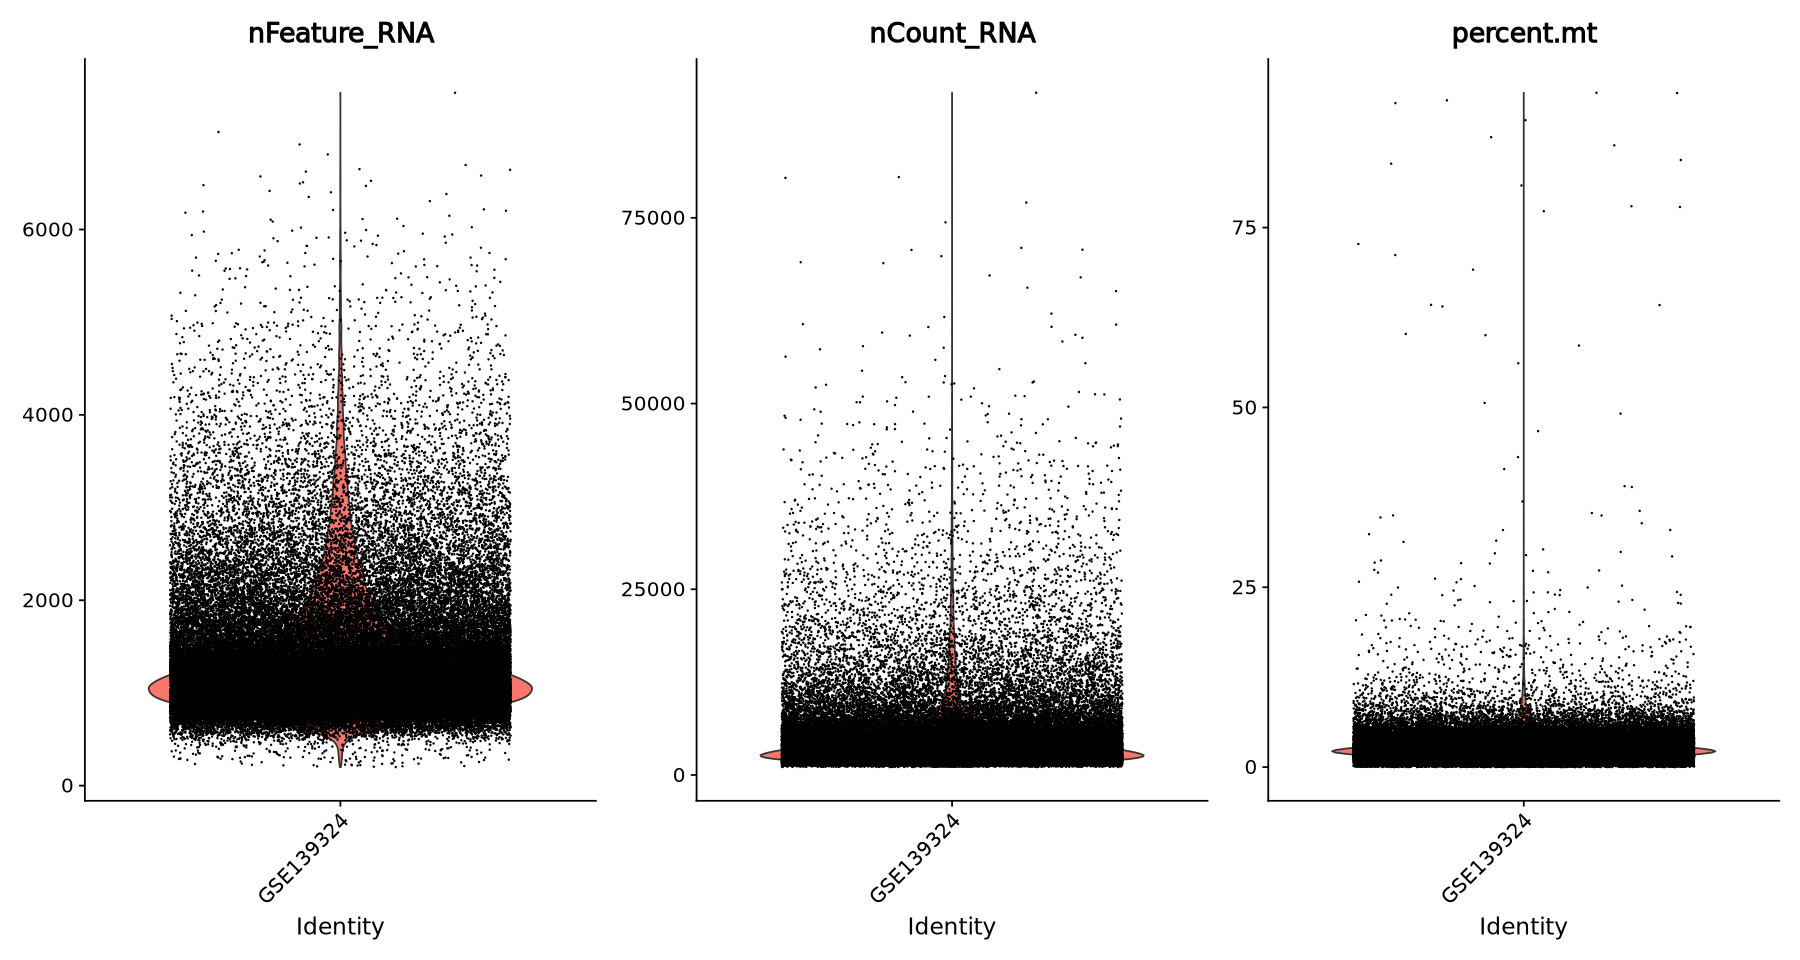

In [44]:
#QC Steps 
HNSCC[["percent.mt"]] <- PercentageFeatureSet(HNSCC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(HNSCC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [45]:
#Normalise the data
HNSCC <- NormalizeData(HNSCC)
#Find variable features
HNSCC <- FindVariableFeatures(HNSCC, selection.method = "vst", nfeatures = 2000)
#Scale the data
HNSCC <- ScaleData(HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
HNSCC <- RunPCA(HNSCC, features = VariableFeatures(object = HNSCC))

Normalizing layer: counts.1



Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Normalizing layer: counts.18

Normalizing layer: counts.19

Normalizing layer: counts.20

Normalizing layer: counts.21

Normalizing layer: counts.22

Normalizing layer: counts.23

Normalizing layer: counts.24

Normalizing layer: counts.25

Normalizing layer: counts.26

Normalizing layer: counts.27

Normalizing layer: counts.28

Normalizing layer: counts.29

Normalizing layer: counts.30

Normalizing layer: counts.31

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable

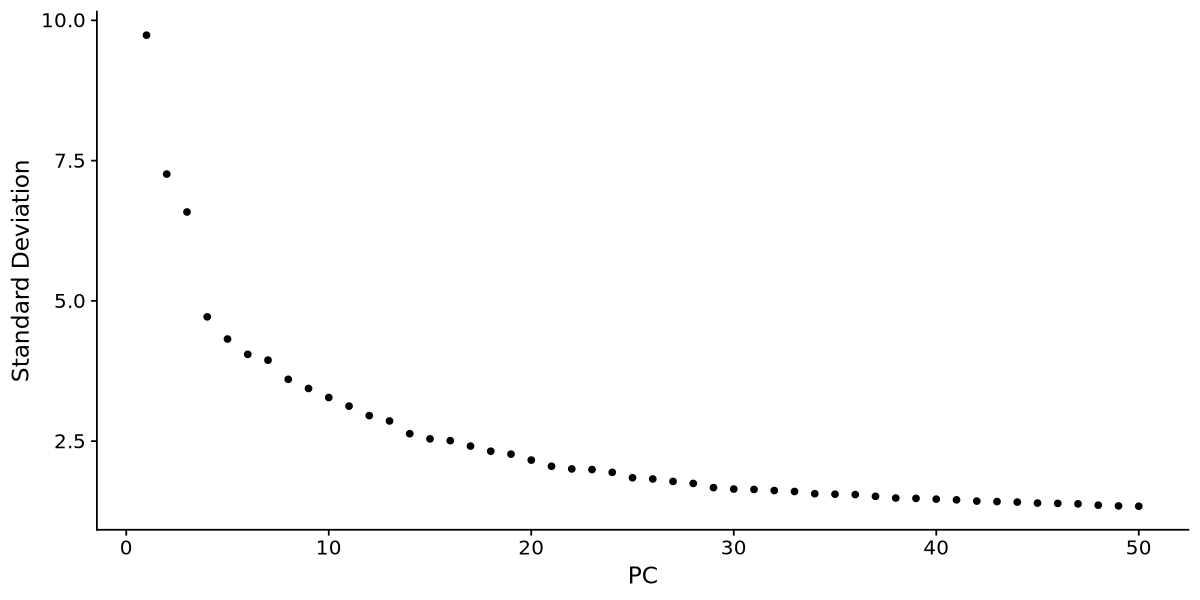

In [46]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(HNSCC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [47]:
#Find neighbours (make sure number matches no. features chosen above)
HNSCC <- FindNeighbors(HNSCC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [48]:
#Run UMAP
HNSCC <- RunUMAP(HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:55:15 UMAP embedding parameters a = 0.9922 b = 1.112

09:55:15 Read 73819 rows and found 40 numeric columns

09:55:15 Using Annoy for neighbor search, n_neighbors = 30

09:55:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:55:26 Writing NN index file to temp file /scratch/temp/9335112/RtmpTxt4Zv/fileffa51e37402d

09:55:26 Searching Annoy index using 1 thread, search_k = 3000

09:56:23 Annoy recall = 100%

09:56:25 Commencing smooth kNN distance calibration using 1 thread
 with ta

In [55]:
#Cluster, resolution here set to 0.2
HNSCC <- FindClusters(HNSCC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 73819
Number of edges: 2488708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 15
Elapsed time: 71 seconds


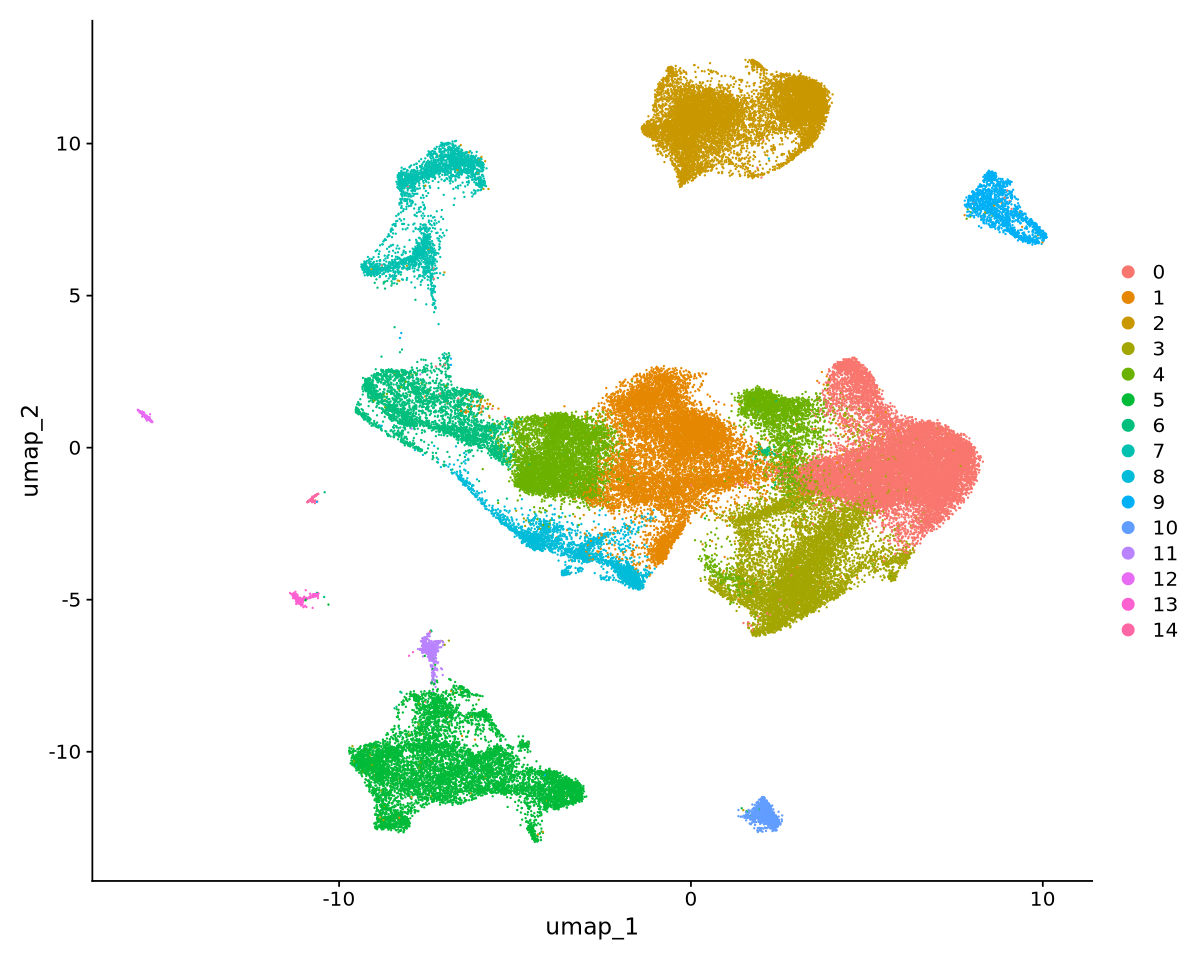

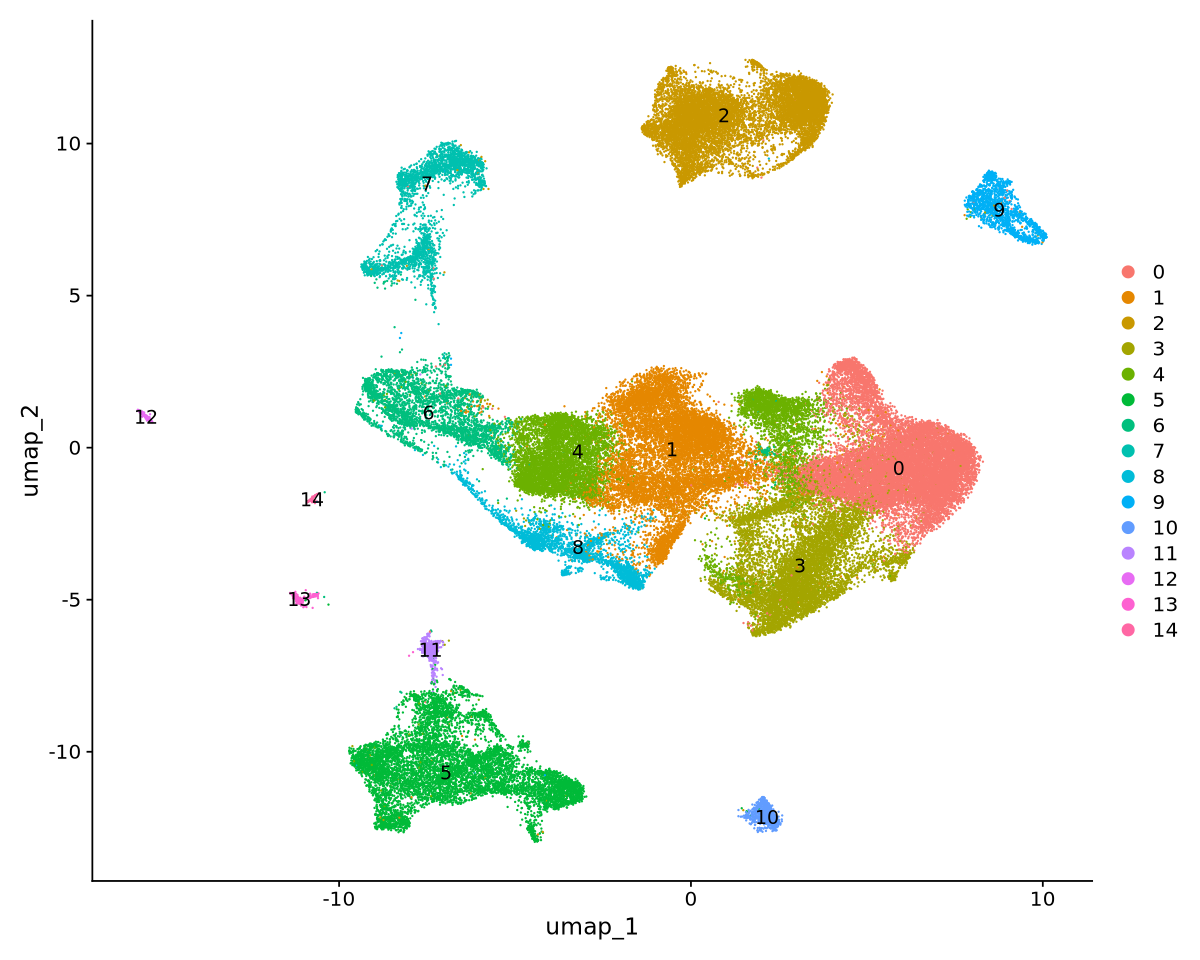

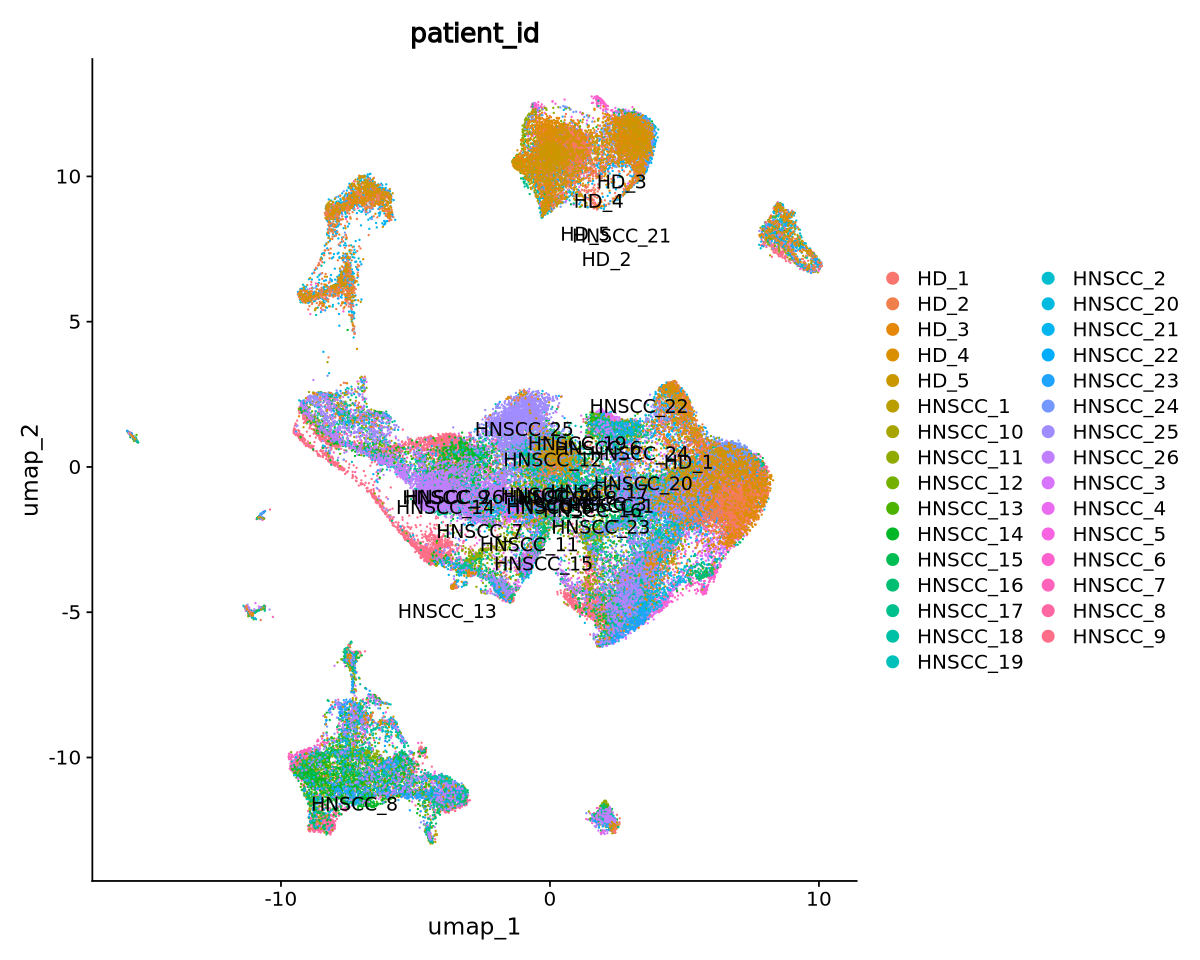

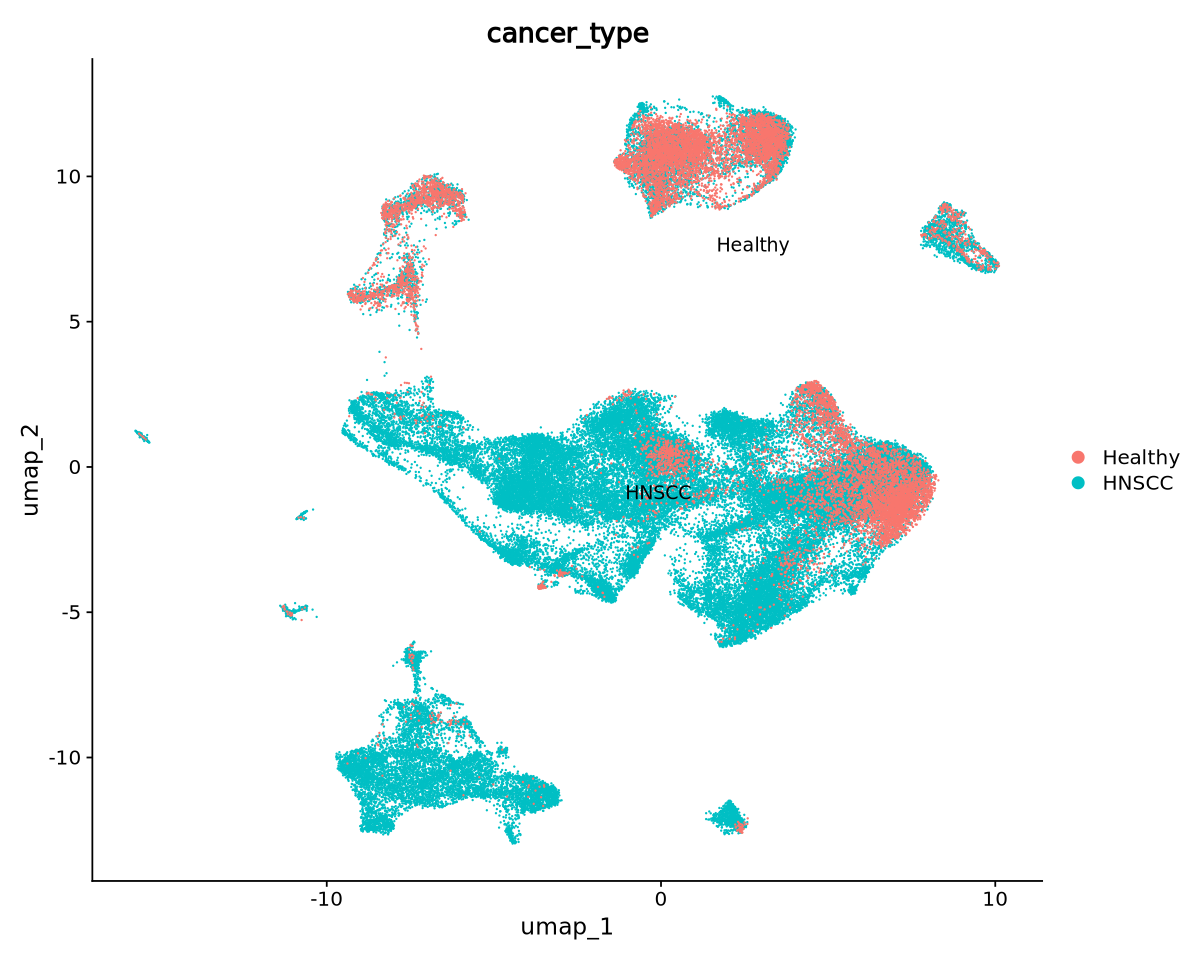

In [56]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(HNSCC, reduction = "umap")
DimPlot(HNSCC, reduction = "umap", label=TRUE)
DimPlot(HNSCC, reduction = "umap", label=TRUE, group = "patient_id")
DimPlot(HNSCC, reduction = "umap", label=TRUE, group = "cancer_type")

In [58]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(HNSCC, file = "/scratch/user/s4436039/scdata/GSE139324/GSE139324.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

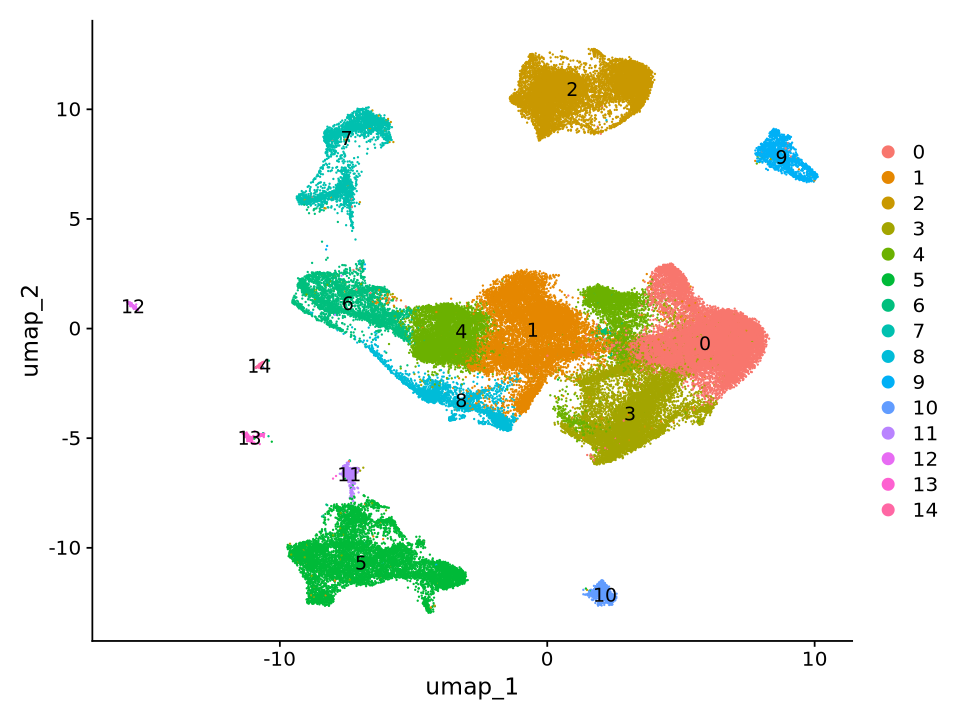

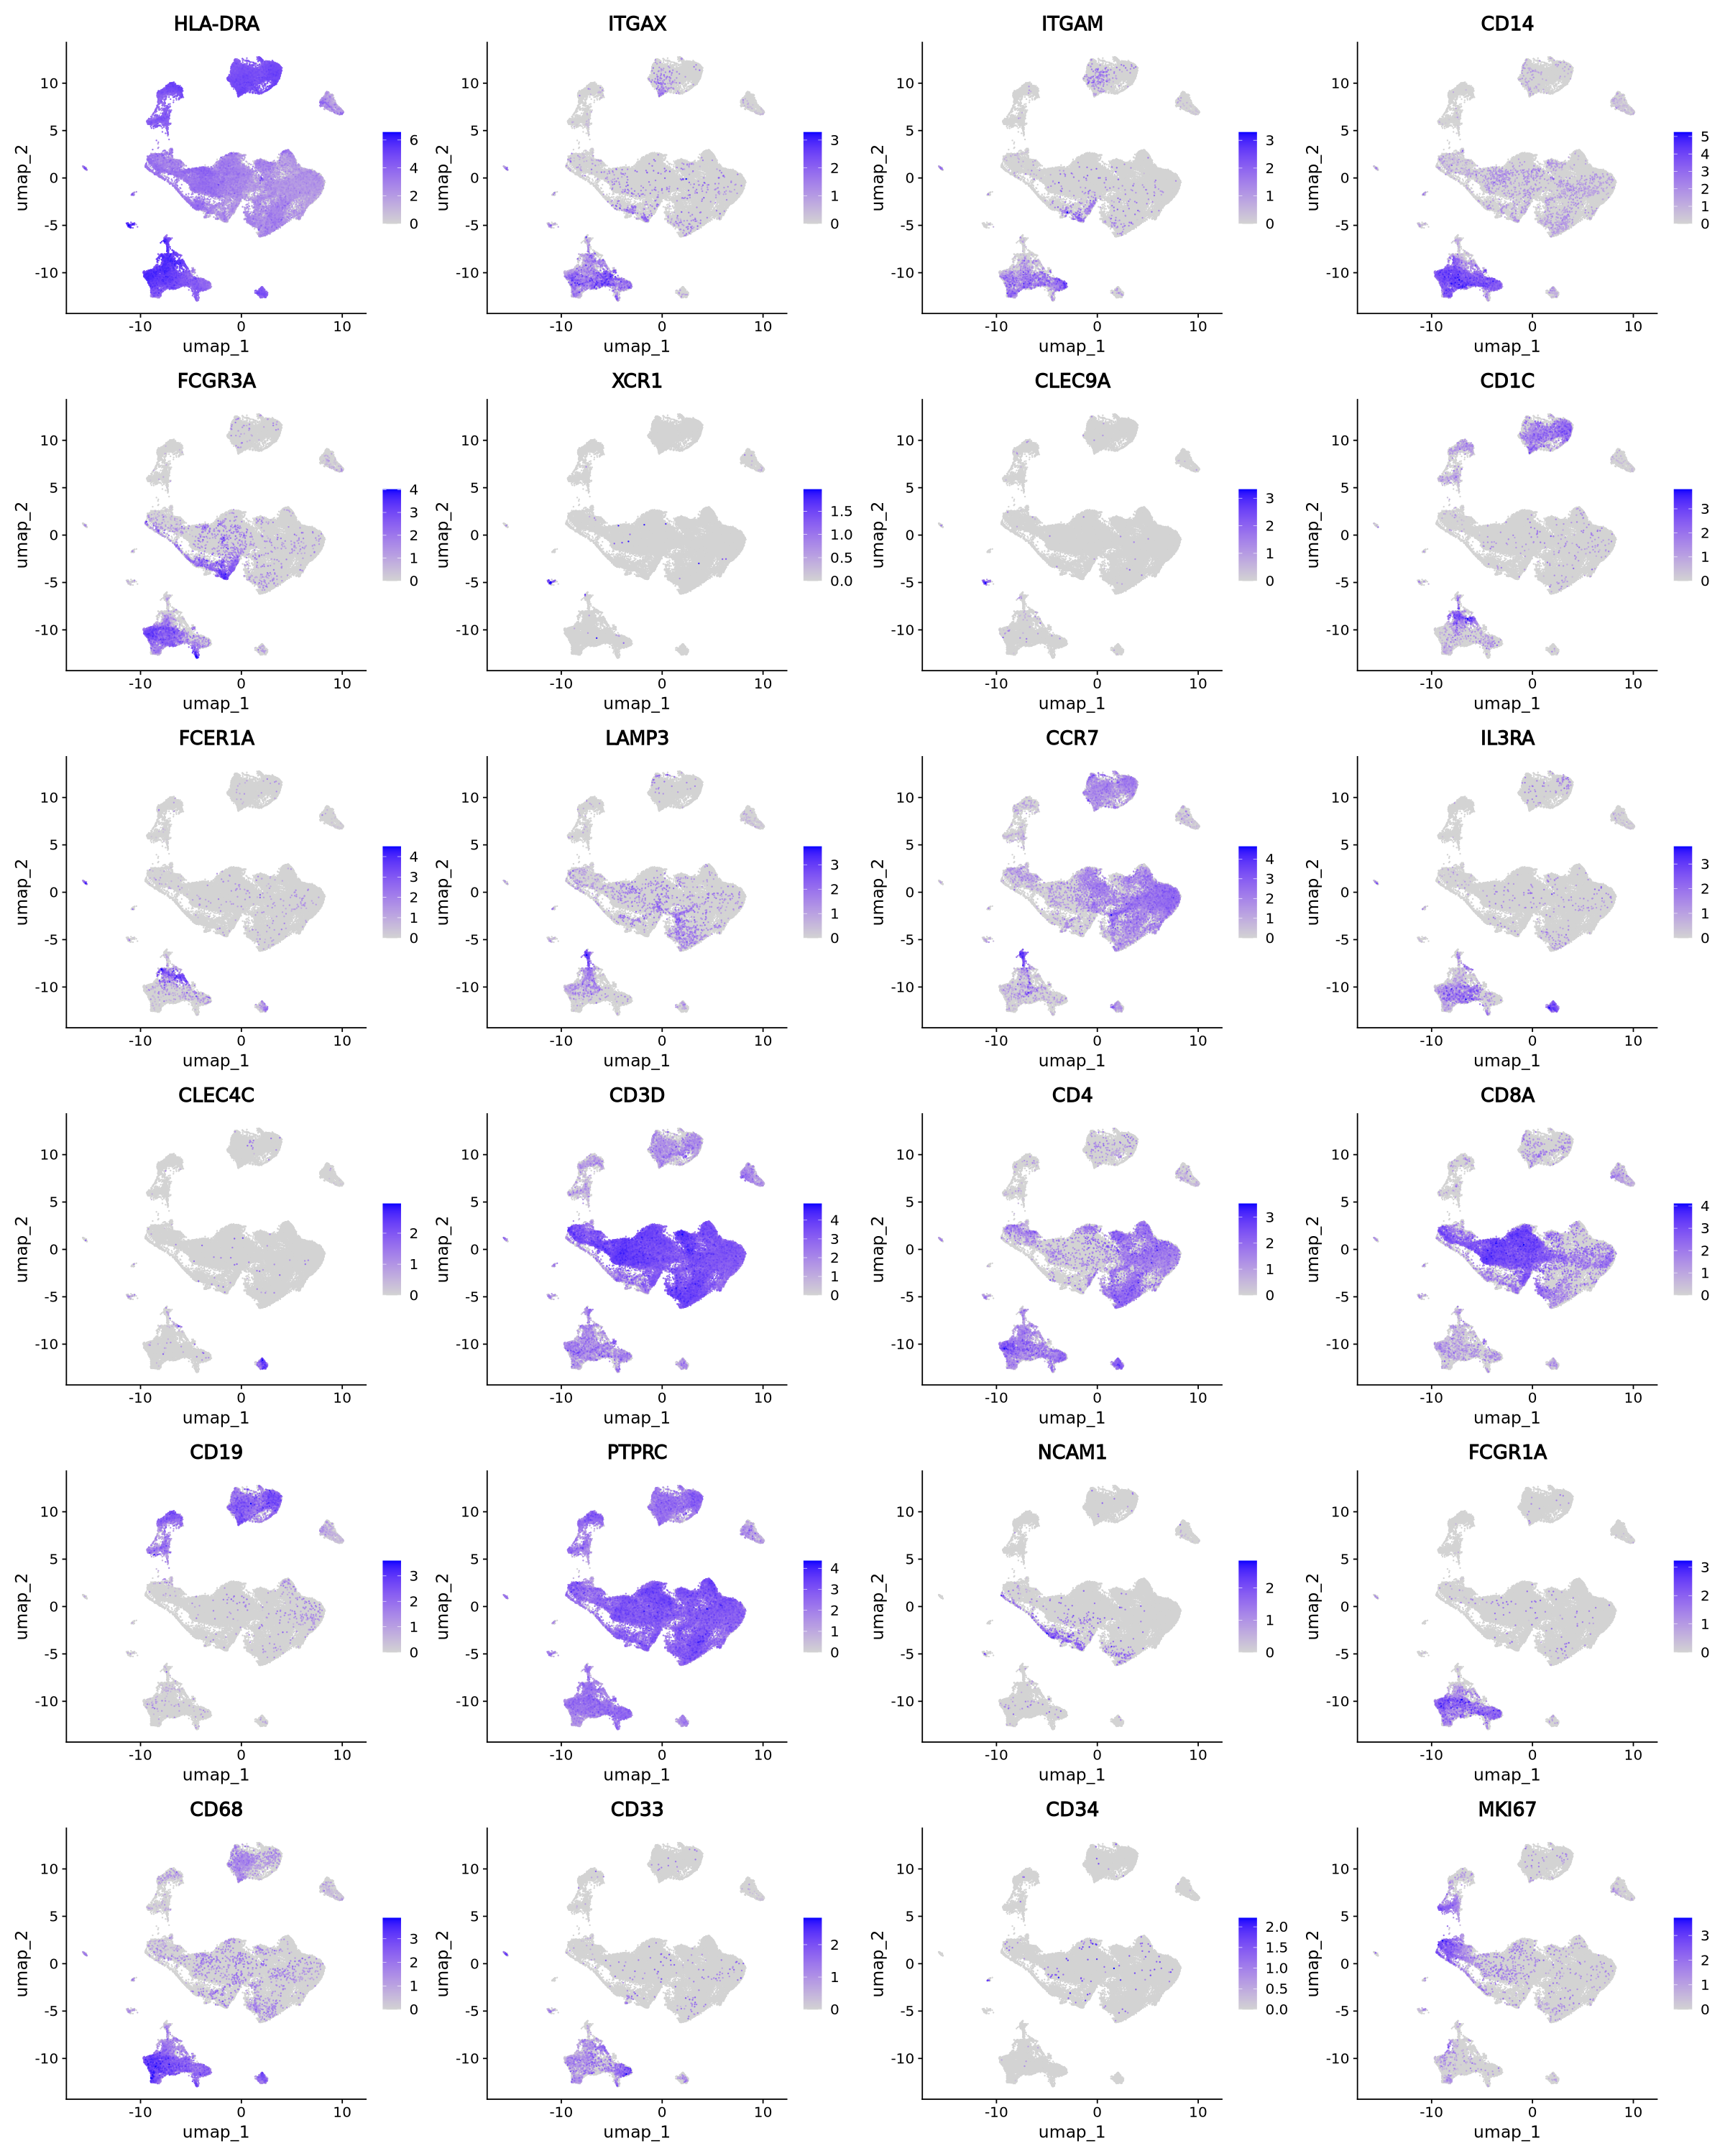

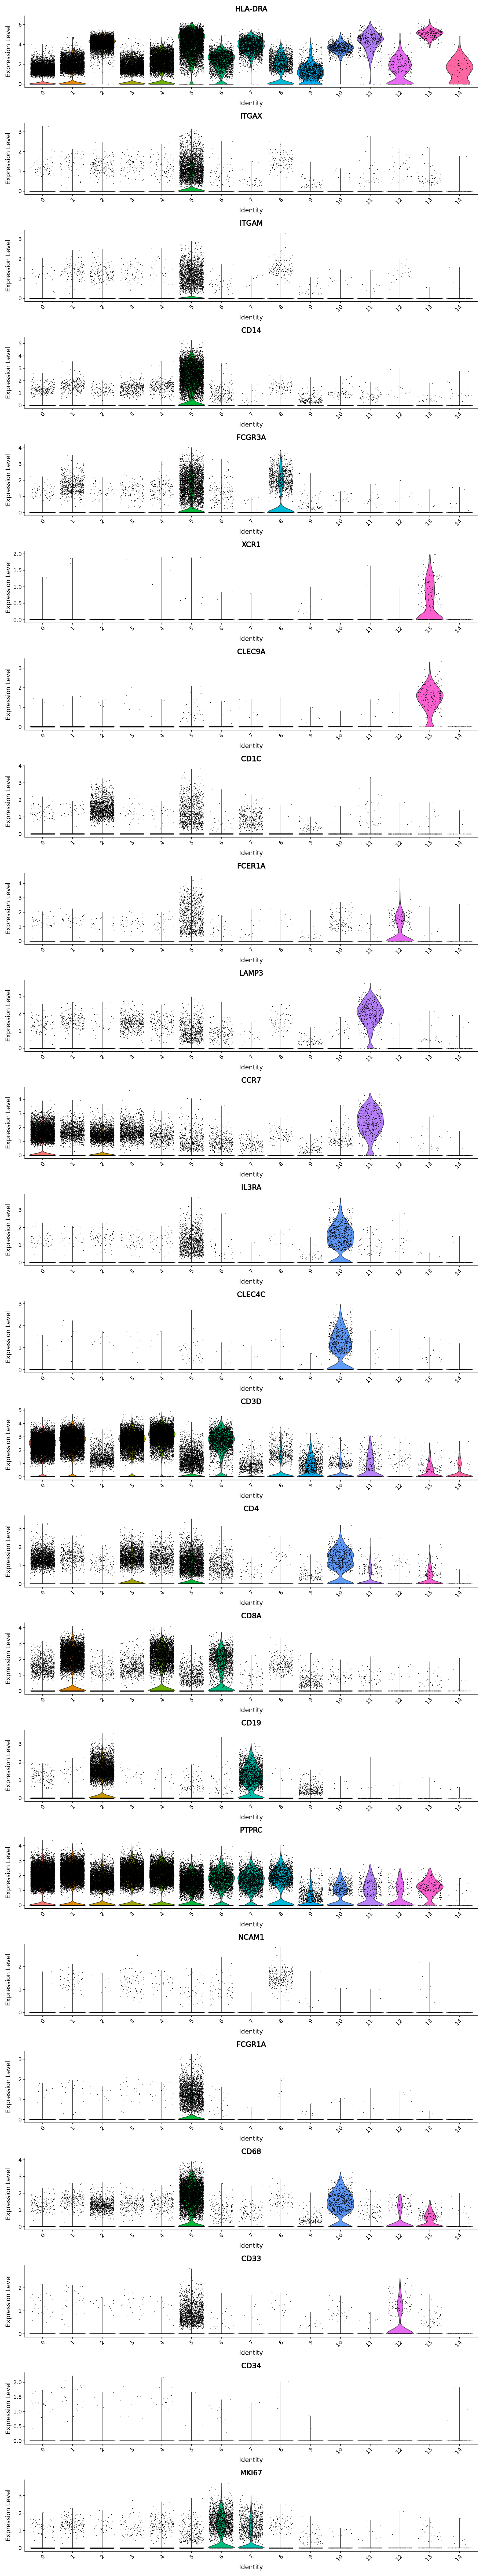

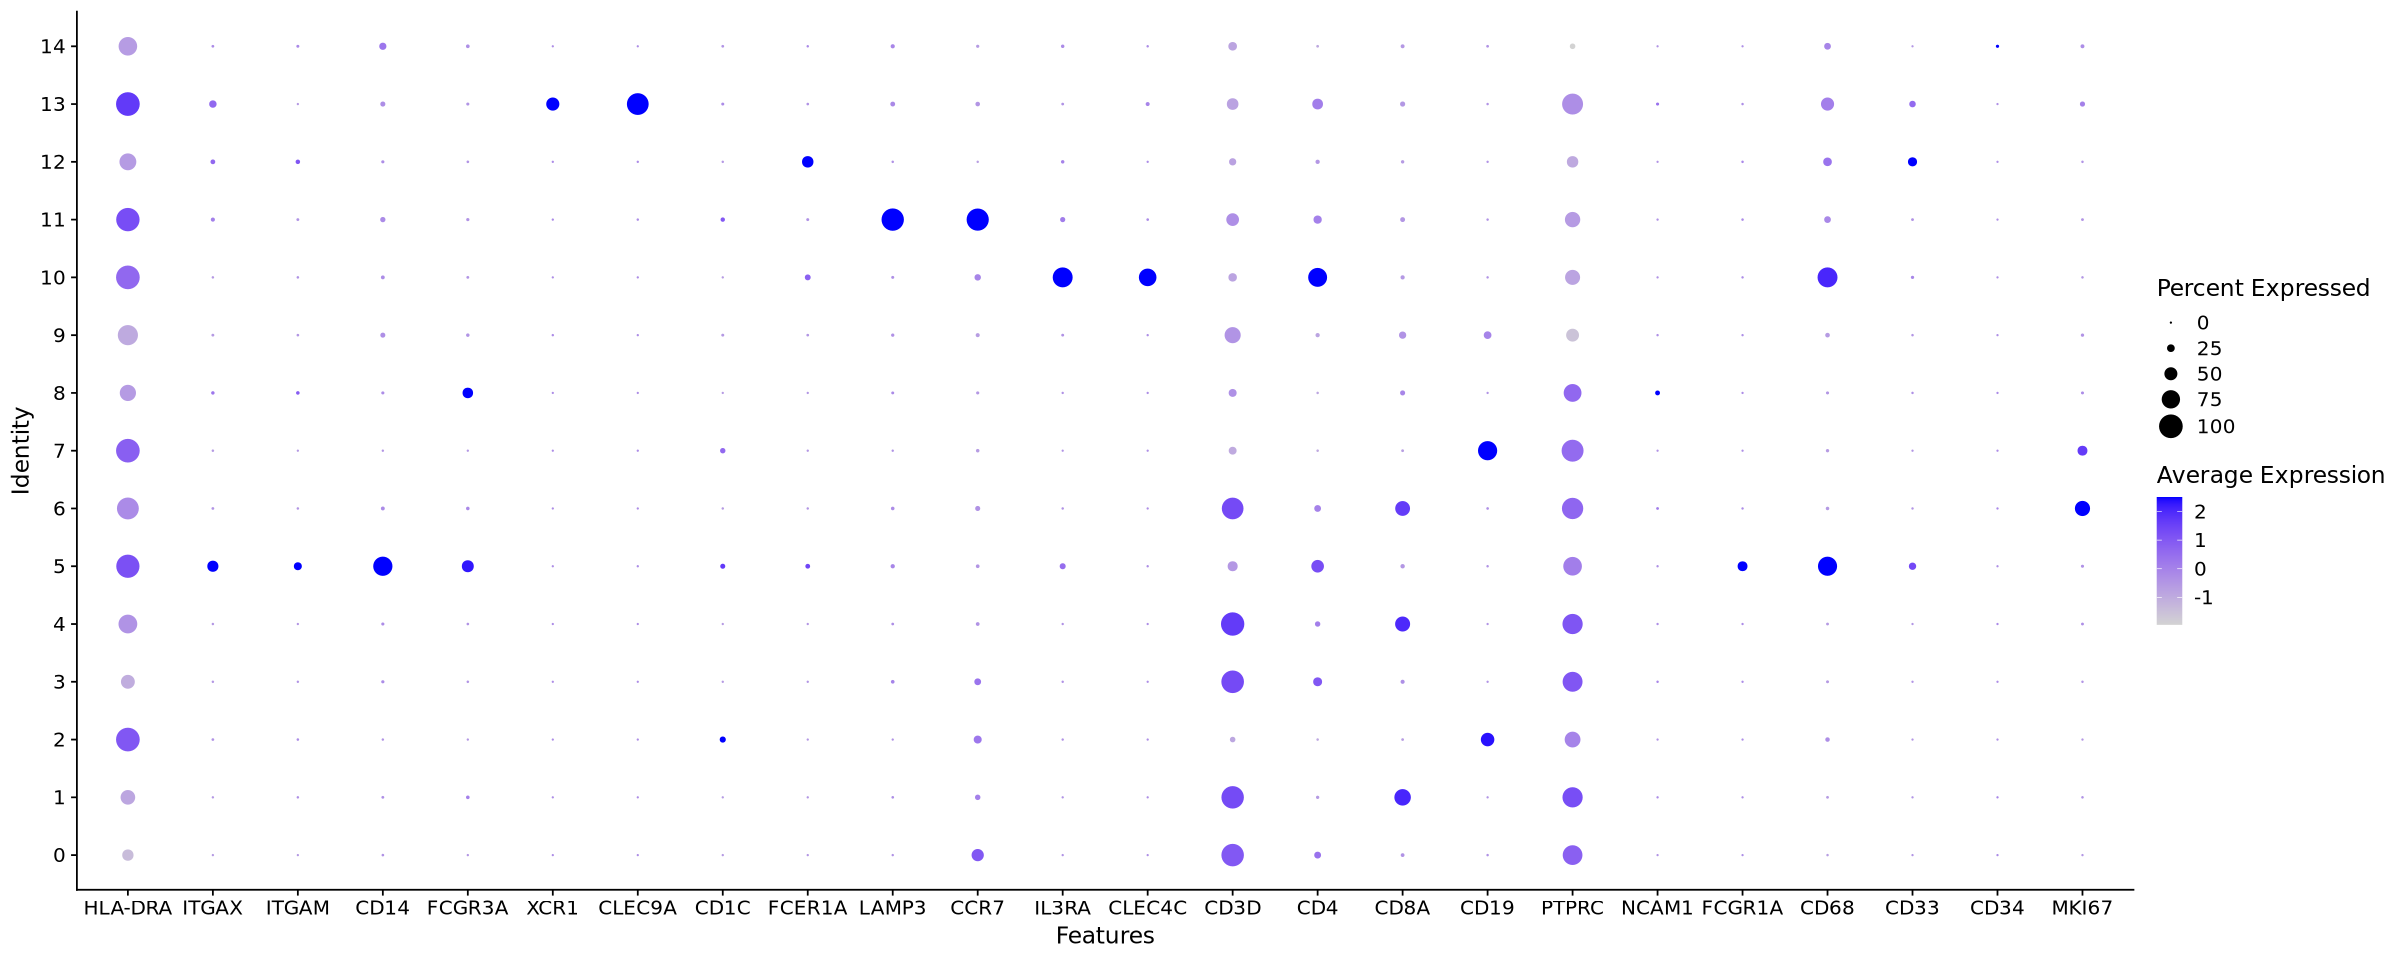

In [57]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(HNSCC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(HNSCC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like clusters 5, 11, 13 are the myeloid cells, now subsetting out these clusters

In [59]:
head(HNSCC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 GSE139324   9917      2061        
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 GSE139324   4697      1261        
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 GSE139324   5976      1717        
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 GSE139324   4109       981        
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 GSE139324  22704      4222        
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 GSE139324   7038      1751        
                                     sample_type cancer_type patient_id
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 tumour      HNSCC       HNSCC_1   
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 tumour      HNSCC       HNSCC_1   
                                     sample_id         percent.mt
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 GSE139324_HNSCC_1 3.166280  
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 GSE139324_HNSCC_1 2.512242  
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 GSE139324_HNSCC_1 4.534806  
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 GSE139324_HNSCC_1 2.871745  
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 GSE139324_HNSCC_1 4.963883  
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 GSE139324_HNSCC_1 3.310600  
                                     RNA_snn_res.0.2 seurat_clusters
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 9               9              
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 0               0              
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 5               5              
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 0               0              
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 3               3              
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 5               5              
                                     RNA_snn_res.0.5
GSE139324_HNSCC_1_AAACCTGAGCTGTCTA-1 16             
GSE139324_HNSCC_1_AAACCTGCAGCTGCTG-1 0              
GSE139324_HNSCC_1_AAACCTGTCTTCGAGA-1 15             
GSE139324_HNSCC_1_AAACGGGAGCTAAGAT-1 0              
GSE139324_HNSCC_1_AAACGGGTCTTGCCGT-1 1              
GSE139324_HNSCC_1_AAAGATGAGCATGGCA-1 5

In [60]:
myeloid_HNSCC <- subset(HNSCC, subset = RNA_snn_res.0.2 %in% c("5","11", "13"))

In [61]:
myeloid_HNSCC

An object of class Seurat 
33694 features across 8995 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 63 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22, counts.23, counts.24, counts.25, counts.26, counts.27, counts.28, counts.29, counts.30, counts.31, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, data.19, data.20, data.21, data.22, data.23, data.24, data.25, data.26, data.27, data.28, data.29, data.30, data.31, scale.data
 2 dimensional reductions calculated: pca, umap

In [62]:
saveRDS(myeloid_HNSCC, "/scratch/user/s4436039/scdata/GSE139324/GSE139324_myeloid.RDS")

#### Following the above then need to move entire GSE112271 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE139324/ /QRISdata/Q5935/nikita/scdata/GSE139324
```